# 주가 지수화
* ref :  https://github.com/FinanceData/FinanceDataReader
* pip install yfinance
* pip install pandas-datareader
* pip install pykrx


In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["figure.figsize"] = (14,4)
mpl.rcParams['axes.grid'] = True 
path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# plt.title('한글제목')
# plt.show()

NanumGothic


In [3]:
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    ax2.grid(False)
    plt.show()

In [5]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
ss = fdr.DataReader('005930','2021-05-01')

#LG전자 (066570)
lg = fdr.DataReader('066570','2021-05-01')

# Apple(AAPL), 2017-01-01 ~ Now
ap = fdr.DataReader('AAPL', '2021-05-01')

In [6]:
print(ss.shape, lg.shape, ap.shape)

(18, 6) (18, 6) (20, 6)


In [7]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2021-05-03 to 2021-05-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    18 non-null     int64  
 1   High    18 non-null     int64  
 2   Low     18 non-null     int64  
 3   Close   18 non-null     int64  
 4   Volume  18 non-null     int64  
 5   Change  18 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1008.0 bytes


In [8]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-05-03 to 2021-05-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Volume  20 non-null     float64
 5   Change  20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [9]:
ss.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-05-03,81000,82400,81000,81700,15710336,0.002454
2021-05-04,81900,82600,81800,82600,12532550,0.011016
2021-05-06,81700,82300,81700,82300,17047511,-0.003632
2021-05-07,81800,82100,81500,81900,14154882,-0.004860
2021-05-10,82300,83500,81800,83200,19385027,0.015873


In [10]:
ap.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-05-03,132.54,132.04,134.07,131.83,75140000.0,0.0082
2021-05-04,127.85,131.19,131.49,126.70,137560000.0,-0.0354
2021-05-05,128.10,129.20,130.45,127.97,84000000.0,0.0020
2021-05-06,129.74,127.89,129.75,127.13,78130000.0,0.0128
2021-05-07,130.21,130.85,131.26,129.47,78970000.0,0.0036


In [11]:
df = pd.concat( [ss['Close'], lg['Close'], ap['Close'] ], axis=1, keys = ['ss', 'lg', 'ap'])
# df.columns = ['ss', 'lg', 'ap']
df = df.fillna(method='bfill')
df.head()

,ss,lg,ap
Date,,,
2021-05-03,81700.0,155000.0,132.54
2021-05-04,82600.0,154500.0,127.85
2021-05-05,82300.0,151500.0,128.10
2021-05-06,82300.0,151500.0,129.74
2021-05-07,81900.0,153000.0,130.21


### 변동률(%) 계산 
* ((df_appl['Close'] - df_appl['전일종가'] )/ df_appl['전일종가']) * 100
* (오늘가격 - 어제가격) / 어제가격  * 100

In [12]:
df['ssv'] = df['ss'].pct_change(periods=1) * 100 
df['lgv'] = df['lg'].pct_change(periods=1) * 100 
df['apv'] = df['ap'].pct_change(periods=1) * 100 
df = df.fillna(0)
df.head()
# df_ss['일별등락률'].cumsum()
df.columns 

Index(['ss', 'lg', 'ap', 'ssv', 'lgv', 'apv'], dtype='object')

                 ssv       lgv       apv
Date                                    
2021-05-03  0.000000  0.000000  0.000000
2021-05-04  1.101591 -0.322581 -3.538554
2021-05-05  0.738395 -2.264328 -3.343013
2021-05-06  0.738395 -2.264328 -2.062763
2021-05-07  0.252368 -1.274229 -1.700500


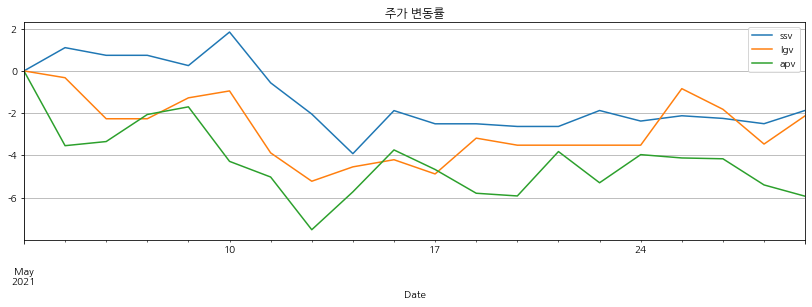

In [13]:
myplot(df[[ 'ssv', 'lgv', 'apv']].cumsum(), title='주가 변동률')

In [14]:
df.to_csv("samlpe.csv")

## 가격지수
* 가격변동률 : (오늘주가-기준일주가) / 기준일주가 * 100
* 시가총액 : 주가 * 발행수           *(다우존스 방식일 경우에만 : 유동비율)
* 가격지수 : 비교일시가총액 / 기준일시가총액 * 100

### Fdr 캔들차트
* pip install bokeh

In [15]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\it\pythonproject2\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [16]:
df.head()

,ss,lg,ap,ssv,lgv,apv
Date,,,,,,
2021-05-03,81700.0,155000.0,132.54,0.000000,0.000000,0.000000
2021-05-04,82600.0,154500.0,127.85,1.101591,-0.322581,-3.538554
2021-05-05,82300.0,151500.0,128.10,-0.363196,-1.941748,0.195542
2021-05-06,82300.0,151500.0,129.74,0.000000,0.000000,1.280250
2021-05-07,81900.0,153000.0,130.21,-0.486027,0.990099,0.362263


In [17]:
df['ss']

Date
2021-05-03    81700.0
2021-05-04    82600.0
2021-05-05    82300.0
2021-05-06    82300.0
2021-05-07    81900.0
2021-05-10    83200.0
2021-05-11    81200.0
2021-05-12    80000.0
2021-05-13    78500.0
2021-05-14    80100.0
2021-05-17    79600.0
2021-05-18    79600.0
2021-05-19    79500.0
2021-05-20    79500.0
2021-05-21    80100.0
2021-05-24    79700.0
2021-05-25    79900.0
2021-05-26    79800.0
2021-05-27    79600.0
2021-05-28    80100.0
Freq: B, Name: ss, dtype: float64

In [18]:
# 캔들차트 그리기 --  bokeh 설치
ssdf = fdr.DataReader('005930', '2021-01-01', '2021-02-15')
# dfcp = pd.DataFrame(df['ss'], columns=['Close']) 
# dfcp.info()

# 차트 설정
config = {'title':'fdr.chart.config()를 사용하여 설정을 한번에 지정할 수 있습니다', 
          'width': 600, 
          'height': 300,
          'volume': True,
}
fdr.chart.config(config=config)
fdr.chart.plot(ssdf, title='삼성전자')
# fdr.show()

Loading BokehJS ...

In [19]:
def futures_price (S, r, d, T, t0):
    t = (T - t0).days / 252
    F = S * math.exp((r-d)*t)
    return F

In [20]:
import math
import datetime as dt

exp_date = dt.date(2018, 12, 14)     # 만기일
to_date = dt.date(2018, 6, 15)     # 현재일

futures_price (100.0, 0.02, 0.015, exp_date, to_date)

100.36176390281524

### KRX 거래소 전체

In [21]:
def myfind(name, sname='KRX'):
    krx = fdr.StockListing(sname)
    search = list(krx['Name'])
    for i in range(len(krx)):
        if (search[i]==name):
            print(krx['Symbol'][i])
            return

In [22]:
# import requests
# from bs4 import BeautifulSoup 
# # code = '005930' #삼성전자
# url = f"http://finance.naver.com/item/sise_day.nhn?code={code}"
# req = requests.get(url, headers={'User-agent': 'Mozilla/5.0'})
# html = BeautifulSoup(req.text, "lxml")
# # print(html)

In [23]:
# KRX stock symbol list
krx = fdr.StockListing('KRX') # 코스피, 코스닥, 코넥스 전체
kospi = fdr.StockListing('KOSPI') # 코스피
kosdaq = fdr.StockListing('KOSDAQ') # 코스닥
konex = fdr.StockListing('KONEX') # 코넥스

In [24]:
myfind('삼성전자','krx')

005930


## 오버나잇 효과
* 밤새 주식을 들고있는 경우
* 장마감 후 움지이지않고 potential만 가지고 있다가 이후, 다음날 장이 열리는 시점에 Gap 을 통해 거래되지 않은 시세를 분출
* 장 중에 움직이는 주가가 상승 확률이 높을지 or 장이 끝난 후, 다음날 아침이 되는 지점이 주가 상승 확률이 높을지 

In [25]:
# 당일시초가 매수 - 종가 매도
kospi_df['Open2Close'] = (kospi_df['Close'] - kospi_df['Open'])

# 당일종가 매수 - 다음날시초가 매도
kospi_df['Close2TmrOpen'] = (kospi_df['Open'] - kospi_df['Close'].shift(1))

overNight = kospi_df[['Open2Close', 'Close2TmrOpen']].fillna(0) # 데이터가 없는 첫날은 0

overNight.cumsum().plot()
plt.show()

NameError: name 'kospi_df' is not defined

# 거래소 종모코드 가져오기

In [ ]:
def codefind(name):
    krx = fdr.StockListing('KRX')
    search = list(krx['Name'])
    for i in range(len(krx)):
        if (search[i]==name):
            print(krx['Symbol'][i])
            return

In [ ]:
# codefind('카카오')

In [ ]:
# codefind('삼성전자')